# Communities in networks

There are many methods to find communities in a network. [This paper](https://www.sciencedirect.com/science/article/pii/S0370157316302964) provides a user guide.

In [38]:
import networkx as nx
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter, defaultdict

Let's first develop some intuitions of what a community is.

Remember the co-authorship network between network scientists?

In [4]:
netsci_coauthor_net = nx.read_gml('../../../datasets/s4/netscience.gml')

Again, we will focus on its largest connected component:

In [5]:
netsci_lcc = netsci_coauthor_net.subgraph(max(nx.connected_components(netsci_coauthor_net), key=len))

We will first plot its adjacency matrix:

In [9]:
netsci_adj_unwei = nx.adjacency_matrix(netsci_lcc).todense()

In [10]:
netsci_adj_unwei

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

This is an unweighted version, with only 0 and 1 as elements.

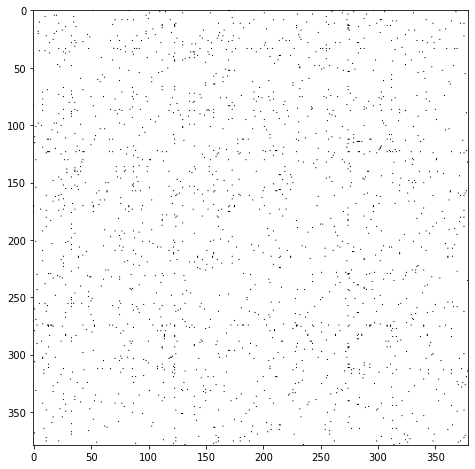

In [12]:
plt.figure(figsize=(8,8))
plt.imshow(netsci_adj_unwei, cmap='Greys')

What can we observe from this?

Now let's find communities and then re-order the rows and columns based on community assignment. 

We will use a popular method called [Louvain method](https://en.wikipedia.org/wiki/Louvain_method). 

Install and import the method:

In [2]:
! pip3 install python-louvain

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [13]:
import community as community_louvain

In [14]:
netsci_louvain = community_louvain.best_partition(netsci_lcc)

It returns a dict containing which community a node belongs to:

In [15]:
netsci_louvain['NEWMAN, M']

15

Reverse the dict to get nodes of a community:

In [45]:
netsci_louvain_comm_nodes = defaultdict(list)
for node, comm in netsci_louvain.items():
    netsci_louvain_comm_nodes[comm].append(node)

In [46]:
netsci_louvain_comm_nodes[15]

['NEWMAN, M',
 'DODDS, P',
 'GASTNER, M',
 'HOPCROFT, J',
 'GIRVAN, M',
 'CALLAWAY, D',
 'STROGATZ, S',
 'LEICHT, E',
 'PARK, J',
 'ANCELMEYERS, L',
 'PORTER, M',
 'SANWALANI, V',
 'JIN, E',
 'MUCHA, P',
 'FORREST, S',
 'YEUNG, M',
 'CLAUSET, A',
 'SABEL, C',
 'ROTHMAN, D',
 'MARTIN, M',
 'SCHRAG, S',
 'WATTS, D',
 'BALTHROP, J',
 'MATTHEWS, P',
 'KALAPALA, V',
 'MIROLLO, R',
 'GHOSHAL, G',
 'LUSSEAU, D',
 'MUHAMAD, R',
 'WARMBRAND, C',
 'MOORE, C']

How many communities?

In [47]:
n_comm = len(netsci_louvain_comm_nodes)
n_comm

19

Sort community based on number of nodes:

In [18]:
comm_by_size = sorted(netsci_louvain_comm_nodes, 
                      key=lambda x: len(netsci_louvain_comm_nodes[x]), 
                      reverse=True)
comm_by_size

[13, 10, 18, 15, 5, 0, 1, 4, 3, 6, 11, 9, 17, 8, 14, 2, 12, 16, 7]

Reorder the nodes:

In [19]:
nodelist = [n for comm in comm_by_size for n in netsci_louvain_comm_nodes[comm]]

In [20]:
netsci_adj_unwei_reordered = nx.adjacency_matrix(netsci_lcc, nodelist=nodelist).todense()

Plot it again:

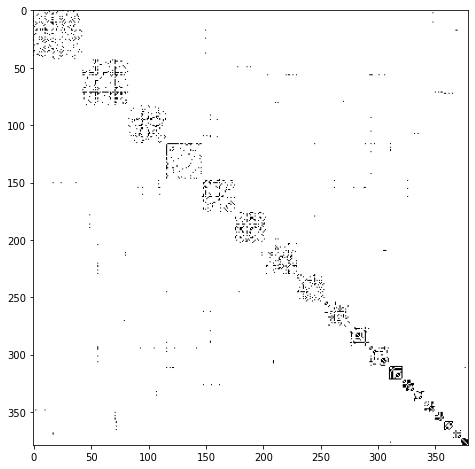

In [22]:
plt.figure(figsize=(8,8))
plt.imshow(netsci_adj_unwei_reordered, cmap='Greys')

We can also incorporate the community information into network visualization:

In [23]:
netsci_degree = nx.degree_centrality(netsci_lcc)

Get a `Colormap`() instance with (# communities) colors:

In [48]:
cmap = cm.get_cmap('viridis', n_comm)

In [49]:
cmap(0)

(0.267004, 0.004874, 0.329415, 1.0)

In [50]:
sns.color_palette([cmap(i) for i in range(n_comm)])

[(0.267004, 0.004874, 0.329415),
 (0.281446, 0.08432, 0.407414),
 (0.281412, 0.155834, 0.469201),
 (0.267968, 0.223549, 0.512008),
 (0.244972, 0.287675, 0.53726),
 (0.21621, 0.351535, 0.550627),
 (0.190631, 0.407061, 0.556089),
 (0.168126, 0.459988, 0.558082),
 (0.147607, 0.511733, 0.557049),
 (0.127568, 0.566949, 0.550556),
 (0.119699, 0.61849, 0.536347),
 (0.143303, 0.669459, 0.511215),
 (0.20803, 0.718701, 0.472873),
 (0.304148, 0.764704, 0.419943),
 (0.430983, 0.808473, 0.346476),
 (0.565498, 0.84243, 0.262877),
 (0.709898, 0.868751, 0.169257),
 (0.85581, 0.888601, 0.097452),
 (0.993248, 0.906157, 0.143936)]

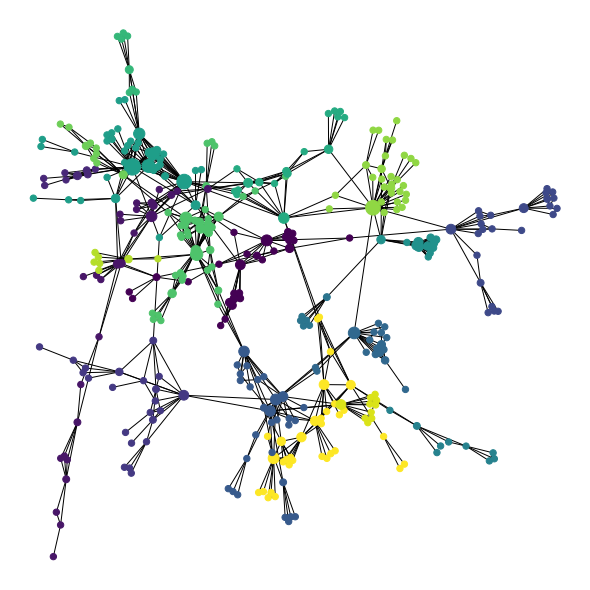

In [36]:
fig = plt.figure(figsize=(8,8))
nx.draw(netsci_lcc, 
        with_labels=False, 
        node_color=[netsci_louvain[n] for n in list(netsci_lcc)],
        cmap=cmap,
        node_size=[max(3000*netsci_degree[n], 40) for n in list(netsci_lcc)], # based on degree centrality
       )

Let's go ["from Louvain to Leiden"](https://www.nature.com/articles/s41598-019-41695-z). Can you reproduce the figure above using Leiden method? How do the two algorithms differ? 

To install it:

In [ ]:
! pip3 install leidenalg

In [ ]:
import leidenalg as la